In [2]:
import pandas as pd

# Vocabulaire

On peut commencer par quelques définitions:
- **`Times Series`** : Ensemble d'observation dont l'ordre joue un rôle important

On divise traditionnelement les séries temporelles en trois parties:
- **`Tendance`** : orientation générale d'une série temporelle une fois lissée : croissante, décroissante,stable / linéraire, quadratique, exponentielle.
- **`Saisonnalité`** : écart cyclique autour de la tendance, il peut y avoir plusieurs saisonnalité sur une même série: annuelle, mensuelle, quotidienne
- **`Bruit`** : Ce qui s'écarte résiduellement de la tendance et de la saisonnalité une fois celles-ci modélisées.

![serie temp](https://user.oc-static.com/upload/2018/03/30/15224251266959_st_Airpass.jpeg)

# Désaisonnalisation des séries temporelles

Avant même de parler de prévision, la première chose que l'on souhaite souvent réaliser avec une série temporelle est de l'analyser. Cette analyse passe par la comparaison de sa valeur en différents points. Or la saisonnalité des séries temporelles rend cette comparaison peu évidente. On va donc chercher à mettre en place des techniques pour désaisonnaliser les séries temporelles afin de les rendre CVS (corrigées des variations saisonnières).

Pour faire cela la méthode la plus utilisée est la moyenne mobile

## La moyenne mobile en théorie

Le principe de la moyenne mobile est simple, plutot que de prendre chaque point de manière isolé on va calculer la moyenne des valeurs de ce point et d'autres points autour de lui. Cela permet théoriquement:
- De laisser la **`tendance invariante`**
- De **`supprimer la saisonnalité`** (voir exemple concret). On dit aussi "absorber la saisonnalité"
- De **`diminuer le bruit`** (on prend la moyenne de plusieurs écart, donc ils se compensent entre eux) 

Pour prendre un **`exemple concret`**, quand on dit que l'**`inflation`** était de 3% en juin, cela ne veut pas dire que les prix ont augmenté de 3% seulement pour le moins de juin. On prend en effet en compte l'augmentation entre juillet dernier et ce mois de juin. Habituellement les prix augmentent pendant la période des fêtes car la demande est plus importante, mais ce n'est pas de l'inflation. C'est pour ne pas être géné par ce phénomène qu'on regarde pour chaque mois l'augmentation des prix sur les 12 mois écoulés. En faisant cela, chaque observation "incorpore" un mois de décembre. 

Encore un peu de vocabulaire, une moyenne mobile peut être:
- **`normalisée`**: c'est la moyenne classique, on additionne chaque point qu'on divise. On utilise aussi des moyennes a base exponentielle
- **`centrée`**(on prend en compte autant d'instants passés que futurs) ou non (on ne connait pas le futur donc on prend que le passé)
  - Quand on analyse on aura tendance à utiliser des moyennes non centrées, à l'inverse de quand on cherche à construire un modèle.
- **`symétrique`** (on donne des poids similaires aux instants passés et futurs de même ordre) ou non (plus un point est proche, plus il a un poids important)

## La moyenne mobile concrètement

Il y a deux cas de figure:
- soit on cherche les saisonnalités permettant de lisser notre ST: on utilise alors un algorithme qui va essayer d'estimer la tendance puis les différentes saisonalités. 
  - Exemple la météo: D'accord, il y a les 4 saisons, mais il y a aussi le cycle des marais, des cycles pluri-annuelle (el Nino...) qui jouent sur la température
- soit on travaille avec des saisonnalités intuitives ou liées à notre étude: la semaine pour les ventes d'un magasin, l'année pour les résultats d'une entreprise...

### Creer des moyennes mobiles avec pandas et rolling et ewm

Rolling permet de créer des moyennes mobiles:
- centrées ou non (paramètre center)
- symétrique ou non (paramètre win_type)
- en fonction d'une fenètre qui peut être nombre d'observation ou un [offset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) (paramètre window)

<AxesSubplot: xlabel='date'>

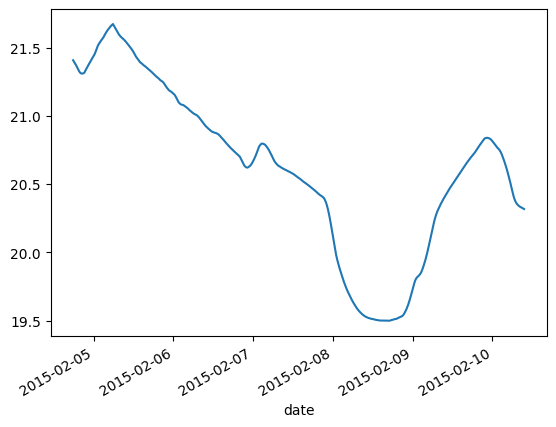

In [3]:
occupancy = pd.read_csv("data/occupancy_training.csv", index_col="date", parse_dates = True)
occupancy["Temperature"].rolling(window="D",center=True, win_type=None).mean().plot()

On peut aussi calculer des moyennes mobiles exponentielles: elles sont normalisées et non centrées, ce qui les caractérise c'est que les poids suivent une distribution exponentielle, les points les plus proches dans le passé on un poids important mais cette important diminue exponentiellement plus on remonte loin dans le passé. Cette baisse exponentielle dépend d'un facteur alpha

<AxesSubplot: xlabel='date'>

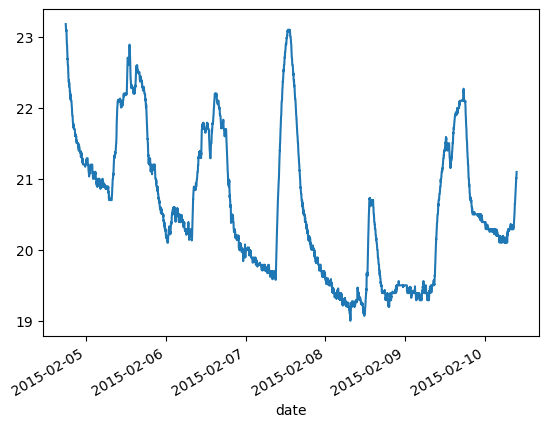

In [11]:
# Cela ne marche pas vraiment pour ce sujet:
occupancy["Temperature"].ewm(alpha= 0.6).mean().plot()